# Time-lapse inversion
In this notebook we will see how to use pyR2 API to do a time-lapse inversion (difference).

In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import os
import sys
sys.path.append(os.path.relpath('../src')) # add here the relative path of the API folder
testdir = '../examples/dc-2d-timelapse/'
from resipy import R2

API path =  /media/jkl/data/phd/tmp/pyr2/src/resipy
ResIPy version =  2.0.1


Then we can import all the dataset. Note that they should all be in the same directory and will be sorted according to alphabetical order.

In [3]:
k = R2()
k.createTimeLapseSurvey(testdir + 'data/')

Working directory is: /media/jkl/data/phd/tmp/pyr2/src/resipy/invdir
clearing the dirname
Inf or NaN: filterData: 0 / 344 quadrupoles removed.
strange quadrupoles: filterData: 0 / 344 quadrupoles removed.
36/344 reciprocal measurements NOT found.
0 measurements error > 20 %
../examples/dc-2d-timelapse/data/17031501.csv imported
--------- ../examples/dc-2d-timelapse/data/17031501.csv imported
Inf or NaN: filterData: 0 / 344 quadrupoles removed.
strange quadrupoles: filterData: 0 / 344 quadrupoles removed.
36/344 reciprocal measurements NOT found.
0 measurements error > 20 %
../examples/dc-2d-timelapse/data/17040301.csv imported
--------- ../examples/dc-2d-timelapse/data/17040301.csv imported
Inf or NaN: filterData: 0 / 314 quadrupoles removed.
strange quadrupoles: filterData: 0 / 314 quadrupoles removed.
48/314 reciprocal measurements NOT found.
0 measurements error > 20 %
../examples/dc-2d-timelapse/data/17051601.csv imported
--------- ../examples/dc-2d-timelapse/data/17051601.csv impo

In [7]:
k.surveys # to display the list of the surveys object

The inversion is seamlessly the same. It will automatically take the first survey os background model. Invert it in a specific `ref` directory inside the working directory and then invert the other datasets.

In [8]:
k.invert(parallel=True) # takes a while because it invert all the surveys together

Create Rectangular mesh...
computed DOI : -2.50
Using a quadrilateral mesh.
written mesh.dat file to 
/media/jkl/data/phd/tmp/pyr2/src/resipy/invdir/mesh.dat
done

Writing .in file and protocol.dat ...
written mesh.dat file to 
/media/jkl/data/phd/tmp/pyr2/src/resipy/invdir/mesh.dat
Matching quadrupoles between surveys for difference inversion ...314 in common...done in 0.019783s
done

------------ INVERTING REFERENCE SURVEY ---------------

written mesh.dat file to 
/media/jkl/data/phd/tmp/pyr2/src/resipy/invdir/mesh.dat


 >> R  2    R e s i s t i v i t y   I n v e r s i o n   v3.3 <<

 >> D a t e : 19 - 11 - 2019
 >> My beautiful survey
 >> I n v e r s e   S o l u t i o n   S e l e c t e d <<
 >> Determining storage needed for finite element conductance matrix
 >> Generating index array for finite element conductance matrix
 >> Reading start resistivity from res0.dat
 >> R e g u l a r i s e d   T y p e <<
 >>   L i n e a r    F i l t e r    <<
 >> L o g - D a t a   I n v e r s i o n

Note that we can visualize the different inverted sections using `R2.showResults(index=0, attr='Resistivity(log10)')`.

Mesh plotted in 0.33685 seconds
Mesh plotted in 0.20353 seconds
Mesh plotted in 0.15605 seconds


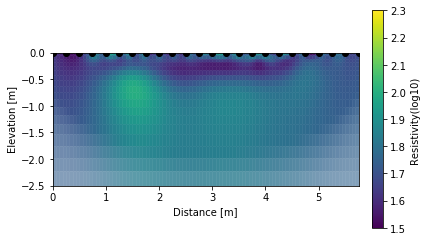

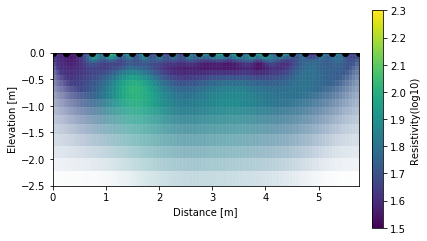

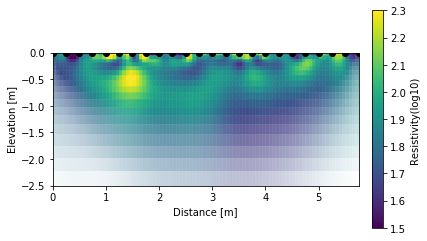

In [11]:
k.showResults(index=0, attr='Resistivity(log10)', contour=False, vmin=1.5, vmax=2.3)
k.showResults(index=1, attr='Resistivity(log10)', contour=False, vmin=1.5, vmax=2.3)
k.showResults(index=2, attr='Resistivity(log10)', contour=False, vmin=1.5, vmax=2.3)

We can also look for the differences between each survey.

Mesh plotted in 0.15433 seconds
Mesh plotted in 0.15495 seconds


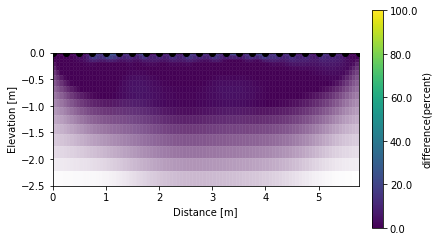

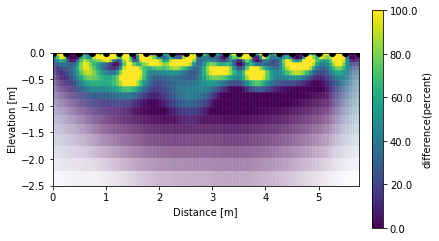

In [13]:
# the differnces are in percent in reference to the backround survey (index=0)
k.showResults(index=1, attr='difference(percent)', contour=False, vmin=0, vmax=100)
k.showResults(index=2, attr='difference(percent)', contour=False, vmin=0, vmax=100)

Like this we can observe a deeper positive change (drying) during the growth season of wheat mainly due to the root water uptake.